In [61]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
tf.__version__

'2.3.0'

In [63]:
dataset_path_new = "./cats_and_dogs_filtered/"

In [64]:
train_dir = os.path.join(dataset_path_new, "train")
validation_dir = os.path.join(dataset_path_new, "validation")

In [65]:
IMG_SHAPE = (128, 128, 3)

In [66]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

In [67]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [68]:
base_model.trainable = False

In [69]:
base_model.output

<tf.Tensor 'out_relu/Relu6_1:0' shape=(None, 4, 4, 1280) dtype=float32>

In [70]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [71]:
global_average_layer

<tf.Tensor 'global_average_pooling2d_1/Mean:0' shape=(None, 1280) dtype=float32>

In [72]:
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)

In [73]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [74]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________________

In [75]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [76]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [77]:
train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(128,128), batch_size=128, class_mode="binary")

Found 2000 images belonging to 2 classes.


In [78]:
valid_generator = data_gen_valid.flow_from_directory(validation_dir, target_size=(128,128), batch_size=128, class_mode="binary")

Found 1000 images belonging to 2 classes.


In [79]:
model.fit_generator(train_generator, epochs=10, validation_data=valid_generator)

Epoch 1/10
16/16 [==============================] - 17s 1s/step - loss: 0.6505 - accuracy: 0.6310 - val_loss: 0.6084 - val_accuracy: 0.6710
Epoch 2/10
16/16 [==============================] - 15s 922ms/step - loss: 0.5504 - accuracy: 0.7310 - val_loss: 0.5304 - val_accuracy: 0.7420
Epoch 3/10
16/16 [==============================] - 14s 878ms/step - loss: 0.4811 - accuracy: 0.7885 - val_loss: 0.4664 - val_accuracy: 0.8000
Epoch 4/10
16/16 [==============================] - 14s 886ms/step - loss: 0.4214 - accuracy: 0.8350 - val_loss: 0.4124 - val_accuracy: 0.8310
Epoch 5/10
16/16 [==============================] - 14s 883ms/step - loss: 0.3728 - accuracy: 0.8635 - val_loss: 0.3667 - val_accuracy: 0.8630
Epoch 6/10
16/16 [==============================] - 14s 893ms/step - loss: 0.3320 - accuracy: 0.8875 - val_loss: 0.3284 - val_accuracy: 0.8780
Epoch 7/10
16/16 [==============================] - 15s 912ms/step - loss: 0.2982 - accuracy: 0.9030 - val_loss: 0.2966 - val_accuracy: 0.8970
Ep

In [80]:
valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


In [81]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))

Accuracy after transfer learning: 0.9240000247955322


In [ ]:
def get_class_string_from_index(index):
   for class_string, class_index in valid_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(valid_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [82]:
def get_class_string_from_index(index):
   for class_string, class_index in valid_generator.class_indices.items():
      if class_index == index:
         return class_string

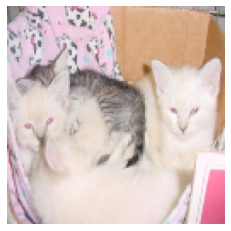

True label: cats
Predicted label: cats


In [90]:
x, y = next(valid_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))